In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/predictions030_time_cross_50.tsv', sep="\t")
print(df)

   project_ids  sample_ids genders  doses  target  prediction  \
0    SRP161461  SRR7817650    male      0       0           0   
1    SRP161461  SRR7817612    male      0       0           0   
2    SRP075814  SRR3593524  female      0       0           0   
3    SRP161461  SRR7817684    male      0       0           0   
4    SRP161461  SRR7817697    male      0       0           0   
..         ...         ...     ...    ...     ...         ...   
63   SRP075814  SRR3593580  female     30       1           1   
64   SRP049440  SRR1636675  female     30       1           1   
65   SRP090688  SRR4317655    male     30       1           1   
66   SRP161461  SRR7817658    male     30       1           1   
67   SRP161461  SRR7817667    male     30       1           1   

    confidence_class_0  confidence_class_1  
0             0.959583            0.040417  
1             0.873867            0.126133  
2             0.858064            0.141936  
3             0.932619            0.067

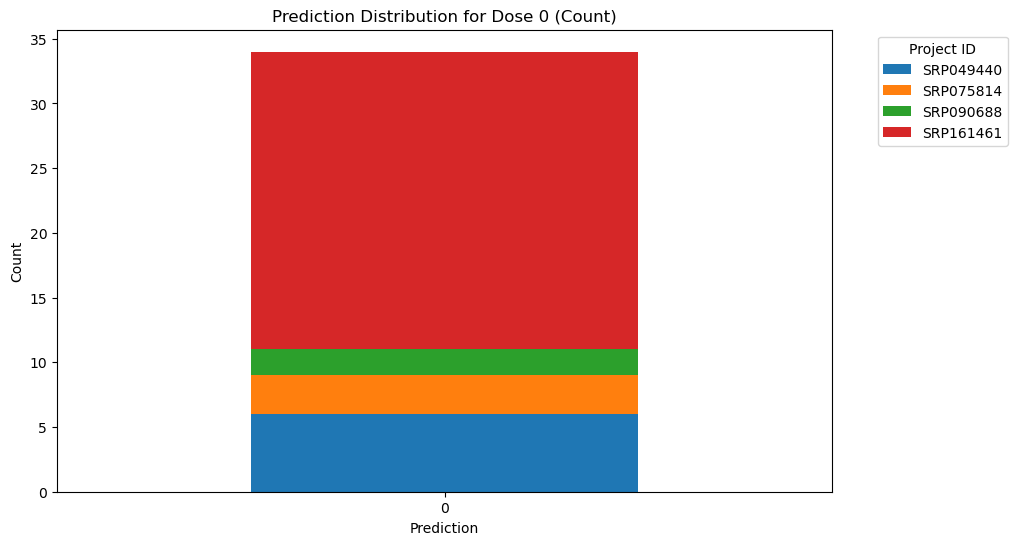

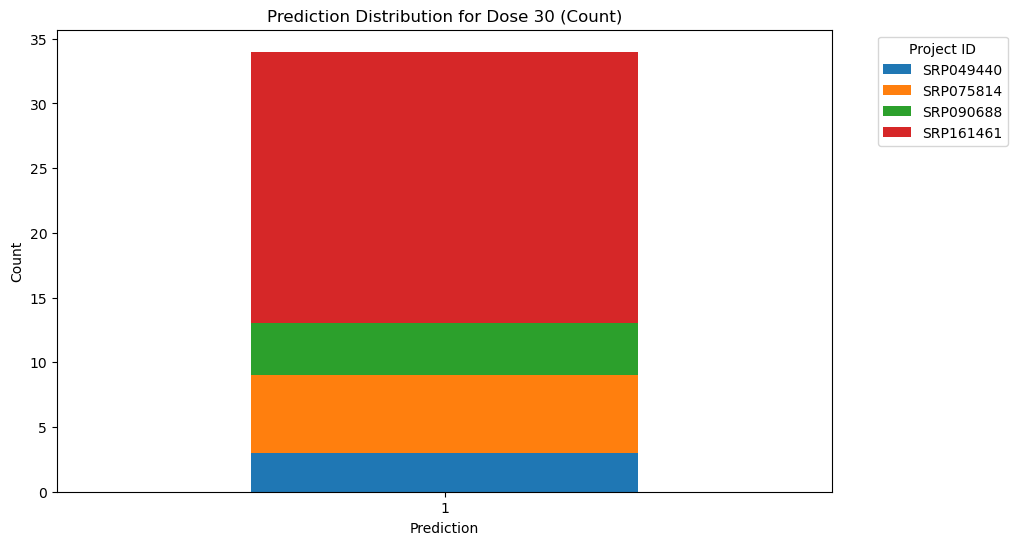

In [ ]:
for dose in df['doses'].unique():
    subset = df[df['doses'] == dose]
    prediction_counts = subset.groupby(['prediction', 'project_ids']).size().unstack(fill_value=0)
    
    ax = prediction_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
    
    plt.title(f'Prediction Distribution for Dose {dose} (Count)')
    plt.xlabel('Prediction')
    plt.ylabel('Count')
    plt.legend(title='Project ID', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=0)
    plt.show()


In [4]:
ig_0 = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/ig_0030_time_cross_50.txt', header=None, sep="\t")
ig_1 = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/ig_1030_time_cross_50.txt', header=None, sep="\t")
edges = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/GEO_model_training/input/edgeLabels.csv', header=None, sep=" ")
result = pd.concat([ig_0, ig_1, edges], axis=1)
result.columns = ["ig_0", "ig_1", "start", "end"]
print(result)

          ig_0      ig_1          start            end
0     0.036684  0.042426  R-MMU-9613507  R-MMU-9613545
1     0.009878  0.015894  R-MMU-9613545  R-MMU-9613562
2     0.008065  0.009547  R-MMU-9613562  R-MMU-9613670
3     0.009715  0.000465  R-MMU-9639715  R-MMU-9640117
4     0.001593  0.000549  R-MMU-9641089  R-MMU-9641096
...        ...       ...            ...            ...
8551  0.002660  0.002885  R-MMU-8856808  R-MMU-8856813
8552  0.059545  0.020816  R-MMU-8868651  R-MMU-8868648
8553  0.014946  0.011569  R-MMU-8868648  R-MMU-8868661
8554  0.005994  0.002423  R-MMU-8868660  R-MMU-8868658
8555  0.001357  0.012816  R-MMU-8863721  R-MMU-8863723

[8556 rows x 4 columns]


In [5]:
import pandas as pd

sorted_by_ig0 = result.sort_values(by='ig_0', ascending=False)

sorted_by_ig1 = result.sort_values(by='ig_1', ascending=False)

sorted_by_ig0.to_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/sorted_by_ig0030_time_cross_50.csv', sep='\t', index=False)
sorted_by_ig1.to_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/sorted_by_ig1030_time_cross_50.csv', sep='\t',index=False)

